In [2]:
import os, sys, glob, shutil
import argparse
import json
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from pprint import pprint
import torchaudio
import torch
from IPython.display import Audio, display

In [3]:
%cd "D:\Schoolwork\TERM 3\WORK\visual_prosody"

D:\Schoolwork\TERM 3\WORK\visual_prosody


In [4]:
val_mcdv5_df = pd.read_csv(r".\jupyter_walkthrough\metrics\MCD_0707a_1M2.csv")
train_mcdv5_df = pd.read_csv(r".\jupyter_walkthrough\metrics\MCD_0707a_1M2_train.csv")

In [5]:
val_mcdv5_df

,Unnamed: 0,uid,MCD_recon,MCD_gt
0,0,9d58583c-20de-439d-b1cd-9c2265bdedd8,14.045307,14.892075
1,1,4a506707-52ea-493e-98c4-f667e3222d44,12.540949,12.594531
2,2,0b67f942-6ebf-403d-aff0-f4e5d62d3140,15.673298,15.701769
3,3,c237c6d5-f413-4e25-82e2-af7b408d390a,14.850937,16.558865
4,4,22a8a78a-caea-4aa2-be9c-4e02e0d88009,17.308480,14.423147
...,...,...,...,...
2710,2710,254a40cd-e43a-4e53-a2ee-02562f48b5a4,16.169212,16.108126
2711,2711,e031ca4f-8b3d-47ca-a5ff-1d58a6e8c5dc,15.510704,16.611559
2712,2712,24af5529-539a-4e90-8a8d-5857b4b0267e,18.995192,19.762993
2713,2713,76bae6d4-4a4b-450f-a35d-2172d747d64b,14.728410,15.998575


In [6]:
train_df = pd.read_csv(r".\Data\Ego4D_final_v5\final_dataset_v5\utterances_final_train_v5.csv")
val_df = pd.read_csv(r".\Data\Ego4D_final_v5\final_dataset_v5\utterances_final_val_v5.csv")

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30532 entries, 0 to 30531
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   utterance_id      30532 non-null  object 
 1   video_id          30532 non-null  object 
 2   person_id         30532 non-null  int64  
 3   video_start_time  30532 non-null  float64
 4   video_end_time    30532 non-null  float64
 5   transcription     30532 non-null  object 
 6   sample_duration   30532 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.6+ MB


In [8]:
train_mcdv5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28010 non-null  int64  
 1   uid         28010 non-null  object 
 2   MCD_recon   28010 non-null  float64
 3   MCD_gt      28010 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 875.4+ KB


In [9]:
train_merged_df = pd.merge(train_mcdv5_df, train_df, left_on='uid', right_on='utterance_id')

In [10]:
val_merged_df = pd.merge(val_mcdv5_df, val_df, left_on='uid', right_on='utterance_id')

In [11]:
train_merged_df.shape

(28010, 11)

In [12]:
train_merged_df

,Unnamed: 0,uid,MCD_recon,MCD_gt,utterance_id,video_id,person_id,video_start_time,video_end_time,transcription,sample_duration
0,0,634b2f0d-2cca-4bc6-bb13-905c0c2748e7,10.467250,7.184698,634b2f0d-2cca-4bc6-bb13-905c0c2748e7,733ac083-1962-46c3-9a46-1efee74fee90,1,91.070698,93.692908,I feel like that's what we'll do,2.622222
1,1,e3a4152c-2cf4-44da-991f-b980fd5cdceb,8.997789,9.469486,e3a4152c-2cf4-44da-991f-b980fd5cdceb,733ac083-1962-46c3-9a46-1efee74fee90,1,95.923618,96.388238,because then,0.464626
2,2,247e3a78-fa9e-43c5-acb2-5755a17766cb,12.233850,12.511398,247e3a78-fa9e-43c5-acb2-5755a17766cb,733ac083-1962-46c3-9a46-1efee74fee90,1,99.422698,101.545048,alright coming together remember when I said,2.122404
3,3,7b143212-b828-4231-8ffd-49ab808bb1cc,9.416233,14.096297,7b143212-b828-4231-8ffd-49ab808bb1cc,733ac083-1962-46c3-9a46-1efee74fee90,1,104.976808,108.766698,did you like the private like bag packing thr...,3.789887
4,4,4e7f3fd2-a6dd-40bd-8b88-87b1016f3422,7.149843,7.543718,4e7f3fd2-a6dd-40bd-8b88-87b1016f3422,733ac083-1962-46c3-9a46-1efee74fee90,0,107.565918,108.143188,umm hmm,0.577324
...,...,...,...,...,...,...,...,...,...,...,...
28005,28005,3d67beda-585b-476d-88d6-c01b64d290b2,9.285407,10.148004,3d67beda-585b-476d-88d6-c01b64d290b2,f1d57e76-ed92-463c-be15-0bf82440644a,-1,545.777125,559.767125,l takes a vertex test the skinning approac...,13.989977
28006,28006,beb205c5-72a3-4505-b66e-2502bb0a6a23,7.695923,11.192709,beb205c5-72a3-4505-b66e-2502bb0a6a23,f1d57e76-ed92-463c-be15-0bf82440644a,-1,559.767125,575.487125,of um six thousand eight hundred and ninety ...,15.720000
28007,28007,dd74afef-4887-43f0-8ad2-81a2820f3891,8.107717,9.159638,dd74afef-4887-43f0-8ad2-81a2820f3891,43811320-8b7b-418a-8fc3-414ceeef1ed8,2,1502.177361,1516.367361,the realistic three d model of the human body...,14.189977
28008,28008,a47374fb-18c4-46a9-bf67-76aa4d81ffb8,8.039507,9.702147,a47374fb-18c4-46a9-bf67-76aa4d81ffb8,43811320-8b7b-418a-8fc3-414ceeef1ed8,2,1516.367361,1532.267361,uh it's totally compatible with your list...,15.900000


In [13]:
train_merged_df['sample_duration'].sum() / 3600

21.561015885613504

In [14]:
train_merged_df[train_merged_df['MCD_recon'] < 12.5]['sample_duration'].sum() / 3600

20.583693146888386

In [15]:
train_merged_df[train_merged_df['sample_duration'] > 0.3]['sample_duration'].sum() / 3600

21.53307849584278

In [16]:
train_merged_df['sample_duration'].sum() / 3600

21.561015885613504

In [17]:
val_merged_df[val_merged_df['MCD_recon'] < 20]['sample_duration'].sum() / 3600

1.6363121693121694

In [18]:
val_merged_df[val_merged_df['sample_duration'] > 0.3]['sample_duration'].sum() / 3600

1.7211409926933736

In [19]:
val_merged_df[val_merged_df['MCD_recon'] < 20]['sample_duration'].sum() / 3600

1.6363121693121694

In [20]:
train_merged_df = train_merged_df[train_merged_df['sample_duration'] > 0.3]
train_merged_df = train_merged_df[train_merged_df['MCD_recon'] < 12.5]
train_merged_df['sample_duration'].sum() / 3600

20.55661002771479

In [21]:
val_merged_df = val_merged_df[val_merged_df['sample_duration'] > 0.3]
val_merged_df = val_merged_df[val_merged_df['MCD_recon'] < 20]
val_merged_df['sample_duration'].sum() / 3600

1.6328237213403882

In [22]:
train_merged_df.drop(columns=['Unnamed: 0'], inplace=True)
val_merged_df.drop(columns=['Unnamed: 0'], inplace=True)

<Axes: ylabel='Frequency'>

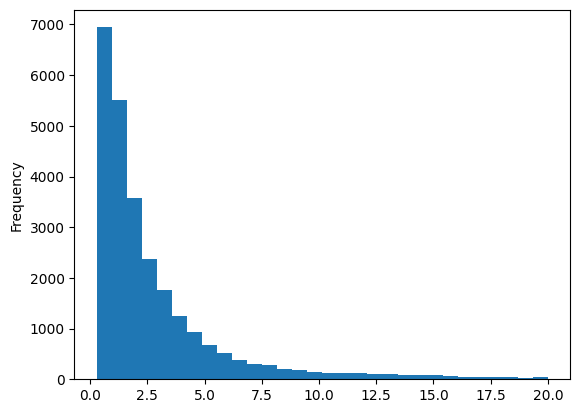

In [23]:
train_merged_df[train_merged_df['MCD_recon'] < 12.5]['sample_duration'].plot(kind='hist', bins=30)

<Axes: ylabel='Frequency'>

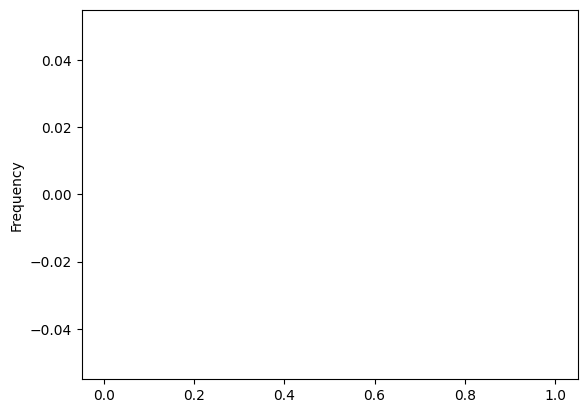

In [24]:
train_merged_df[train_merged_df['MCD_recon'] > 12.5]['sample_duration'].plot(kind='hist', bins=30)

In [25]:
def display_gt_audio_v56(uid, split):
    sampled_uid = uid
    # print(f"uid: {sampled_uid}")
    if split == 'train':
        wav_path = os.path.join(r".\raw_data\Ego4D_final_v5\train\Ego4D_final_v5", f"{sampled_uid}.wav")
        wav_path_v6 = os.path.join(r".\raw_data\Ego4D_final_6\train\Ego4D_final_v6", f"{sampled_uid}.wav")
    elif split == 'val':
        wav_path = os.path.join(r".\raw_data\Ego4D_final_v5\val\Ego4D_final_v5", f"{sampled_uid}.wav")
        wav_path_v6 = os.path.join(r".\raw_data\Ego4D_final_v6\val\Ego4D_final_v6", f"{sampled_uid}.wav")
    display(Audio(filename=wav_path, rate=22050))
    try:
        display(Audio(filename=wav_path_v5, rate=22050))
    except:
        print('v6 not exist')

In [26]:
selection = train_merged_df[train_merged_df['sample_duration'] < 0.3].head(20)
split = 'train'
for uid, mcd, text in zip(selection['uid'].values, selection['MCD_recon'].values, selection['transcription'].values):
    print(f"UID: {uid}")
    print(f"###  MCD: {mcd}")
    print(f"###  TEXT: {text}")
    display_gt_audio_v56(uid=uid, split=split)


<Axes: ylabel='Frequency'>

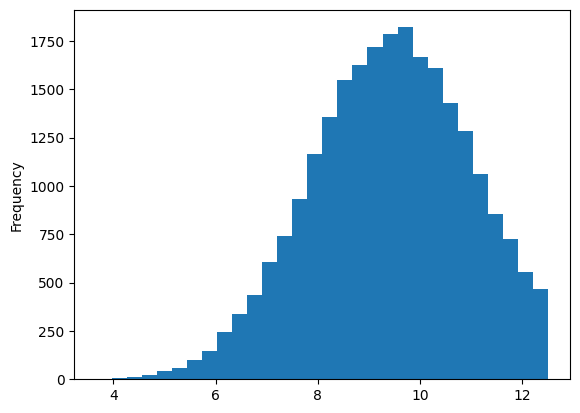

In [27]:
train_merged_df[train_merged_df['sample_duration'] > 0.5]['MCD_recon'].plot(kind='hist', bins=30)

In [28]:
train_merged_df = train_merged_df.rename(columns={'uid': 'utterance_id'})
val_merged_df = val_merged_df.rename(columns={'uid': 'utterance_id'})

In [29]:
train_merged_df.to_csv(r'./jupyter_walkthrough/for_dataset/utterances_final_train_v7.csv', index=False)
val_merged_df.to_csv(r'./jupyter_walkthrough/for_dataset/utterances_final_val_v7.csv', index=False)